# Insurance: Predicting claims
*Created by: 
Anna Sukhareva, data scientist  
Antwerpen, Belgium  
Date: October 13, 2019  
Contacts: anna@linefeed.be*
 ***

## Table of Contents
Stage 1 : Business Understanding  
Stage 2 : Analytic Approach  
Stage 3 : Data Requirements  
Stage 4 : Data Collection  
Stage 5 : Data Understanding  
Stage 6 : Data Preparation  
Stage 7 : Data visualization  
Stage 7 : Modeling  
Stage 8 : Evaluation  
Sample of use  
***

### Stage 1 : Business Understanding
**Problem:**   
The insurance companies are extremely interested in the prediction of the future. Accurate prediction gives a chance to reduce financial loss for the company. Forecasting the upcoming claims helps to charge competitive premiums that are not too high and not too low. It also contributes to the improvement of the pricing models. This helps the insurance company to be one step ahead of its competitors.

**Question:**  
Can we predict if a potential customer will be a claimer?

### Stage 2 : Analytic Approach  
As the question requires a yes/no answer, a classification model will be built.

### Stage 3 : Data Requirements  
**Data content:** To answer the question we need data about current customers, that have next features about each customer: age, sex, bmi, number of children, smorer, region, sum of charges last year, if customer was a claimer last year or no.  
**Data formats:** CSV format  
**Data sources:** corporative information from the insured company.

### Stage 4 :  Data Collection
Data was collected from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset)


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#machine learnong
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import pylab as pl

In [ ]:
!pip install ml_metrics
import ml_metrics

In [4]:
#reading the file
df = pd.read_csv('insurance3r2.csv')

#from Kaggle we read like following: df = pd.read_csv('//kaggle/input/sample-insurance-claim-prediction-dataset/insurance3r2.csv')

### Stage 5 : Data Understanding  
##### Descriptive statistics:

In [6]:
print(df.shape)
print(df.columns)
print(df.describe())

(1338, 9)
Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')
               age          sex          bmi         steps     children  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397   5328.623318     1.094918   
std      14.049960     0.500160     6.098187   2453.643236     1.205493   
min      18.000000     0.000000    15.960000   3000.000000     0.000000   
25%      27.000000     0.000000    26.296250   3008.000000     0.000000   
50%      39.000000     1.000000    30.400000   4007.000000     1.000000   
75%      51.000000     1.000000    34.693750   8004.000000     2.000000   
max      64.000000     1.000000    53.130000  10010.000000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1338.000000  1338.000000   1338.000000     1338.000000  
mean      0.204783     1.515695  13270.422265        0.585

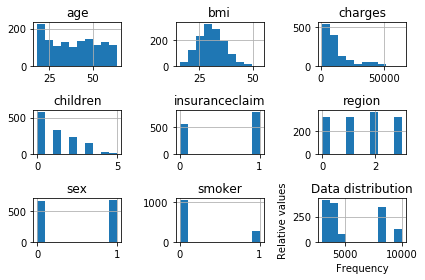

In [9]:
df.hist()
plt.title('Data distribution')
plt.xlabel('Frequency')
plt.ylabel('Relative values')
plt.tight_layout()
plt.show()

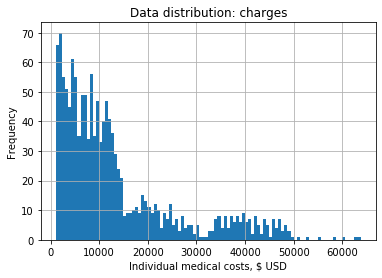

(7, 9)


In [5]:
df.hist(column='charges', bins=100)
plt.title('Data distribution: charges')
plt.xlabel('Individual medical costs, $ USD')
plt.ylabel('Frequency')
plt.show()
charges_outliers = df.loc[df.charges >= 50000]
print(charges_outliers.shape) 

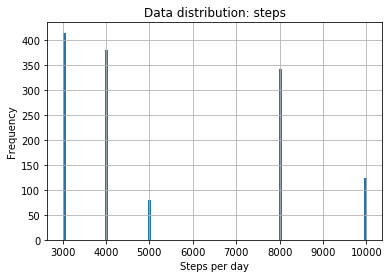

In [6]:
df.hist(column='steps', bins=100)
plt.title('Data distribution: steps')
plt.xlabel('Steps per day')
plt.ylabel('Frequency')
plt.show()

Let's round groups to 3000, 4000, 5000, 8000, 10000 for a nicer overview:

In [10]:
decimals = -3
df['steps']=df['steps'].apply(lambda x: round(x, decimals))
print(df.steps.value_counts())

3000     414
4000     380
8000     342
10000    123
5000      79
Name: steps, dtype: int64


##### Correlation discovering:

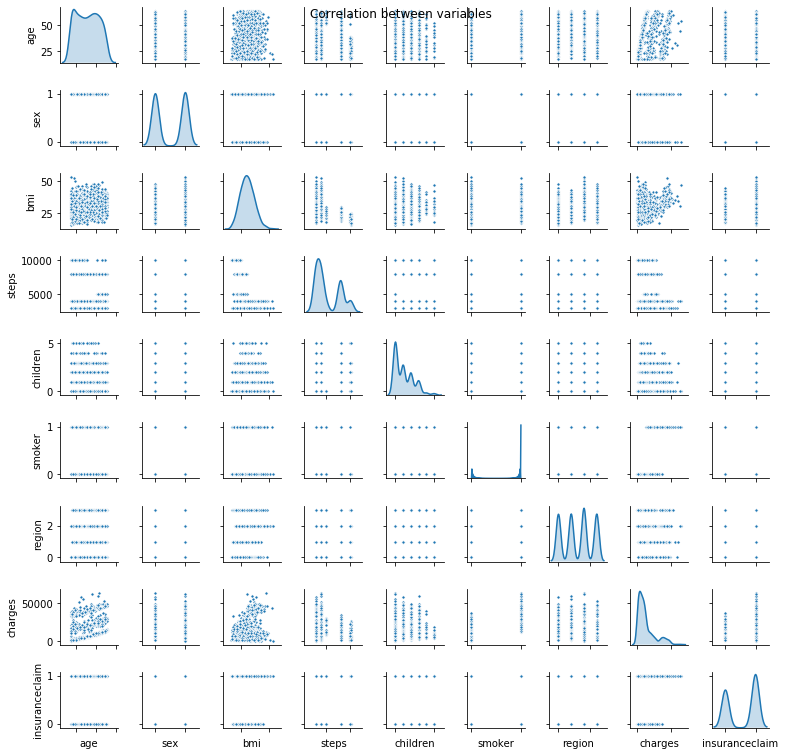

In [8]:
pp = sns.pairplot(df, palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])
plt.suptitle('Correlation between variables')
plt.show()

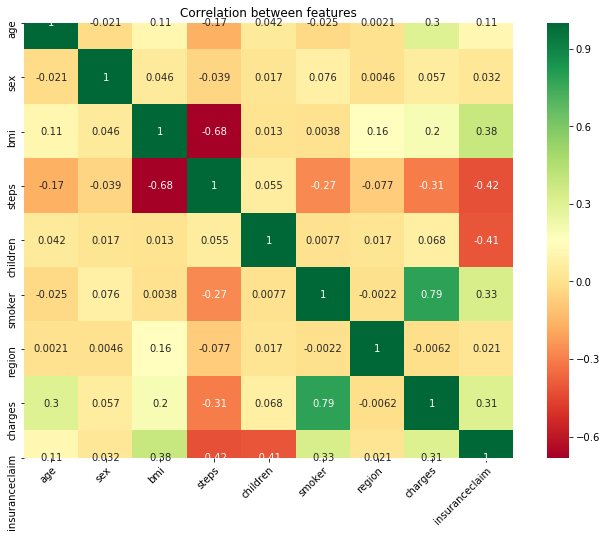

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', annot=True, mask=None)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.title('Correlation between features')
plt.show()

### Stage 6 : Data Preparation  
##### Dealing with missing data and outliers:

(1338, 9)
Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')


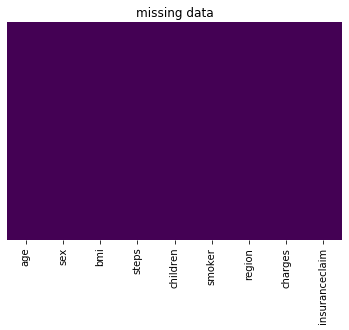

In [2]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('missing data')
plt.show()

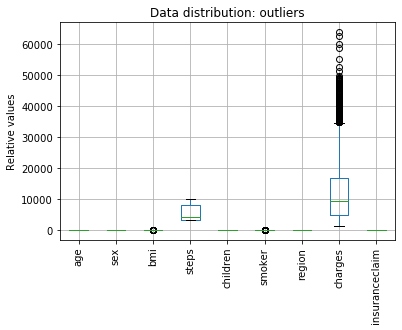

In [14]:
df.boxplot()
plt.title('Data distribution: outliers')
plt.ylabel('Relative values')
plt.xticks(rotation='vertical')
plt.show()

##### Features engineering:

In [19]:
a = df
a['age'] = a['age'].mask(a['age'] <= 20, 1)
a['age'] = a['age'].mask(
    (a['age'] >= 21) & (a['age'] <= 30), 2)
a['age'] = a['age'].mask(
    (a['age'] >= 31) & (a['age'] <= 40), 3)
a['age'] = a['age'].mask(
    (a['age'] >= 41) & (a['age'] <= 50), 4)
a['age'] = a['age'].mask(
    (a['age'] >= 51) & (a['age'] <= 60), 5)
a['age'] = a['age'].mask(a['age'] >= 61, 6)
unique, counts = np.unique(a.age, return_counts=True)

### Stage 7 : Data visualization

**How old are our customers?**

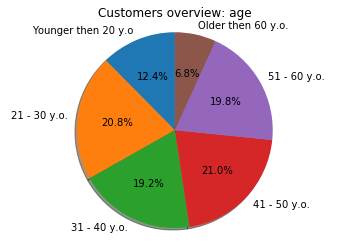

In [10]:
labels = 'Younger then 20 y.o', '21 - 30 y.o.', '31 - 40 y.o.', '41 - 50 y.o.', '51 - 60 y.o.', 'Older then 60 y.o.'
sizes = [166, 278, 257, 281, 265, 91]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customers overview: age')
plt.show()

**Do we have more male clients?**

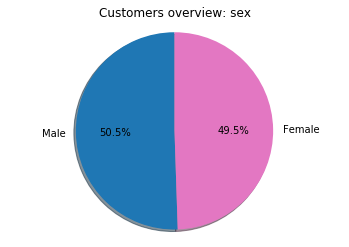

In [11]:
labels = 'Male', 'Female'
sizes = [676, 662]
colors = ['tab:blue', 'tab:pink']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customers overview: sex')
plt.show()

**How much smokers do we have?**

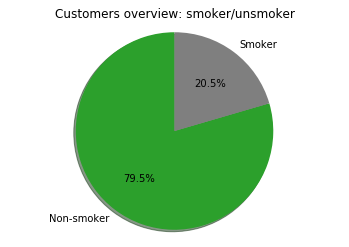

In [12]:
labels = 'Non-smoker', 'Smoker'
sizes = [1064, 274]
colors = ['tab:green', 'tab:gray']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customers overview: smoker/unsmoker')
plt.show()

**How often do our customers claim?**

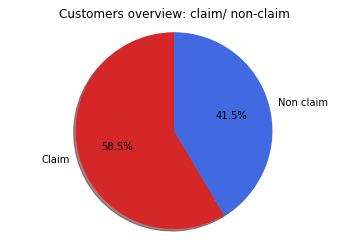

In [13]:
labels = 'Claim', 'Non claim'
sizes = [783, 555]
colors = ['tab:red', 'royalblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customers overview: claim/ non-claim')
plt.show()

### Stage 7 : Modeling 
We build a predictive classification model with next different classifiers :
- RandomForestClassifier
- GradientBoostingClassifier
- KNeighborsClassifier
- GaussianNB  

The best model will be chosen with ROC curve method.

X_train : (936, 8)
X_test : (402, 8)
y_train : (936,)
y_test : (402,)


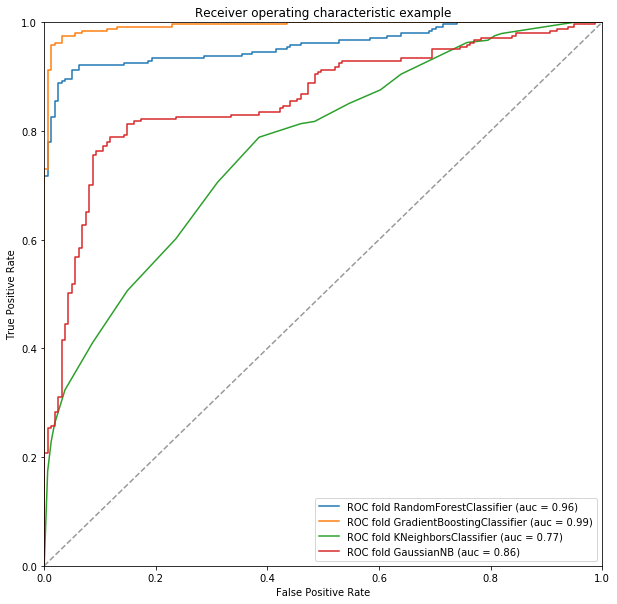

In [21]:
X = df.drop(['insuranceclaim'], axis=1).values
y = df['insuranceclaim'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))
models = []
models.append(RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(KNeighborsClassifier(n_neighbors=20))
models.append(GaussianNB())
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_train, y_train)
    pred_scr = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
    roc_auc = ml_metrics.auc(y_test, pred_scr)
    md = str(model)
    md = md[:md.find('(')]
    pl.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

The best score - GradientBoostingClassifier, accuracy score R^2 is 99%.  
**Result: The model has been built with accuracy score 99%.**

### Stage 8 : Evaluation
As the model has accuracy score 99%, it's accepted as adequate.

### Sample of use:   

2 potential customers: 
1. Ben: age 19, male, bmi 27.9, steps 3000 per day, no children, smoker, North-West, charges last year 16 885 USD,
2. Jerry: age 23, male, bmi 24.3, steps 6000 per day, no children, non-smoker, North-West, charges last year 2 137 USD,
To predict if they will be claimers: 

In [18]:
Ben_Jerry_test = [[1, 0, 27.900, 3000, 0, 1, 3, 16885], [1, 0, 24.3, 6000, 0, 0, 3, 2137]]
df_Ben_Jerry = pd.DataFrame(Ben_Jerry_test)
clf = GradientBoostingClassifier(max_depth =4)
clf.fit(X_train, y_train)
Ben_Jerry_prediction = clf.predict(df_Ben_Jerry)
print('Prediction (1 - claim, 0 - no-claim) {}'.format(Ben_Jerry_prediction))

Prediction (1 - claim, 0 - no-claim) [1 0]


**Result:**
- Ben is predicted as a claimer, 
- Jerry is predicted as no claimer, 
with accuracy of the model 99%.